# Python is an object oriented language

In [1]:
class Dog:
    species = "Canis"
    def __init__(self, name, age):
        self.name = name
        self.age = age
    def say_hello(self):
        print(f"My name is {self.name}")
        
    def stekej(self, kolikrat):
        for i in range(kolikrat):
            print("Haf!")
d = Dog("Alik", 34)

In [2]:
d.name, d.age, d.species

('Alik', 34, 'Canis')

In [3]:
d.say_hello()

My name is Alik


In [4]:
d.stekej(3)

Haf!
Haf!
Haf!


In [5]:
import numpy as np
import matplotlib.pyplot as plt

class Astrosource:
    def __init__(self, x,y, name):
        self.x = x
        self.y = y
        self.name = name
    
    def distance_from(self, x0, y0):
        dist = np.sqrt( (self.x-x0)**2-(self.y-y0)**2)
        return dist
    
    def display(self):
        plt.plot([self.x],[self.y],"*")
        plt.text(self.x, self.y,self.name, ha='center' )

In [6]:
a = Astrosource(10,20, "Alfa")
b = Astrosource(30,20, "Beta")

a.name, a.x, a.y

('Alfa', 10, 20)

In [7]:
a.distance_from(b.x, b.y)

20.0

In [8]:
image = [a,b]

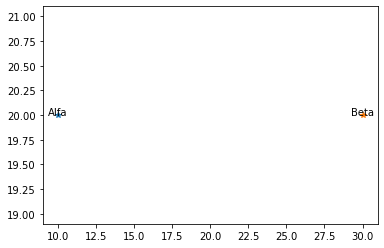

In [9]:
for i in image:
    i.display()

In [10]:
class Galaxy(Astrosource):
    def __init__(self ,x, y, name, r):
        super().__init__(x,y,name)
        self.r = r
        
    def display(self):
        plt.scatter([self.x],[self.y],s=[self.r**2])
        plt.text(self.x, self.y,self.name, ha='center' )

In [11]:
g = Galaxy(30,15,"Andromeda", 20)

In [13]:
g.x, g.y, g.r

(30, 15, 20)

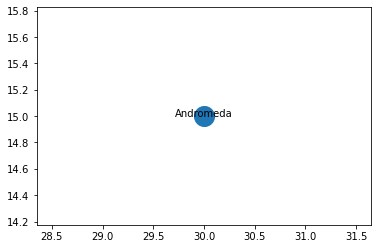

In [15]:
g.display()

In [16]:
image.append(g)

In [17]:
type(a)

__main__.Astrosource

In [14]:
m87 = Galaxy(22,20,"M87",40)
image.append(m87)

In [18]:
from scipy import interpolate

In [19]:
x = np.arange(0, 10)
y = np.exp(-x/3.0)

In [20]:
f = interpolate.interp1d(x, y) # fill_value

In [21]:
isinstance(f, interpolate.interpolate.interp1d)

True

In [22]:
f.bounds_error = False

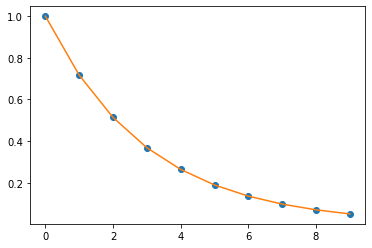

In [23]:
xnew = np.arange(0, 20, 0.1)
ynew = f(xnew)   # use interpolation function returned by `interp1d`
plt.plot(x, y, 'o')
plt.plot(xnew, ynew, '-')

In [24]:
f.fill_value

array(nan)

In [25]:
f.fill_value = 'extrapolate'

In [29]:
def generate_data(N=20, rseed=1):
    rng = np.random.RandomState(rseed)
    x = rng.rand(N)
    sigma_y = 0.1 * np.ones(N)
    
    # linear model with noise
    y = x - 0.2 + sigma_y * rng.randn(N)
    return np.vstack([x, y]).round(2)

x,y = generate_data()

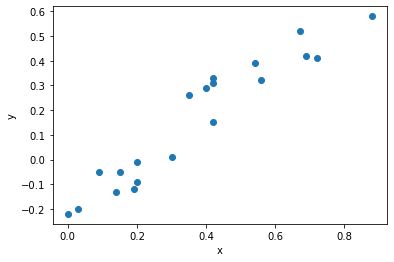

In [30]:
plt.plot(x, y, "o")
plt.xlabel('x')
plt.ylabel('y');

In [31]:
from sklearn.linear_model import LinearRegression

In [34]:
X = x[:,np.newaxis]

model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [35]:
score = model.score(X, y)
print("Model score:", round(score, 4))

Model score: 0.908


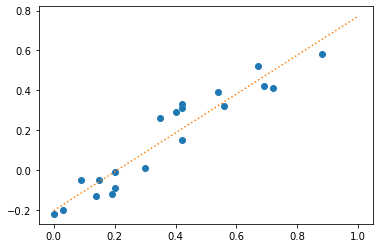

In [37]:
x_fit = np.linspace(0,1,20)[:,np.newaxis]
y_fit = model.predict(x_fit)
plt.plot(x,y,"o")
plt.plot(x_fit, y_fit,":")

In [39]:
from sklearn.svm import SVR

model = SVR(kernel='rbf')
model.fit(X,y)
score = model.score(X, y)
print("Model score:", round(score, 4))

Model score: 0.9075


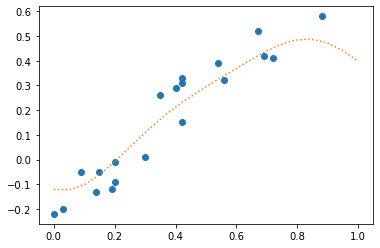

In [40]:
x_fit = np.linspace(0,1,20)[:,np.newaxis]
y_fit = model.predict(x_fit)
plt.plot(x,y,"o")
plt.plot(x_fit, y_fit,":")

In [48]:
models = [LinearRegression, SVR]
pars = [None, { 'kernel':"rbf" } ]
for M, par in zip(models, pars):
    if par:
        model = M(**par)
    else:
        model = M()
        
    model.fit(X,y)
    score = model.score(X, y)
    print("Model", M.__name__, "achieved score", round(score, 4))
    

Model LinearRegression achieved score 0.908
Model SVR achieved score 0.9075
